In [17]:
import pandas as pd     
import numpy as np 
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [19]:
df3 = pickle.load(open("final_telco2","rb"))


In [20]:
df3

,tenure,Churn,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
0,1,0,29.85,29.85,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,1,0,0
2,2,1,53.85,108.15,0,0,1,0,0
3,45,0,42.30,1840.75,1,0,0,0,0
4,2,1,70.70,151.65,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,0,1,0,0
7039,72,0,103.20,7362.90,1,0,1,1,0
7040,11,0,29.60,346.45,0,0,0,0,0
7041,4,1,74.40,306.60,0,0,1,1,0


# smote

In [22]:
X=df3.drop(["Churn"], axis=1)
y=df3["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.7)

In [23]:
steps = [('o', over)]
pipeline = Pipeline(steps=steps)


In [24]:
# transform the dataset
X, y = pipeline.fit_resample( X, y)

In [177]:
y.value_counts()

0    5163
1    3097
Name: Churn, dtype: int64

In [179]:
pickle.dump(X_test,open("test","wb"))

# XGBoost

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [102]:
xgb_model =  XGBClassifier(n_estimators = 1500,  learning_rate = 0.01, max_depth= 10, subsample =0.8)
xgb_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=True)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

[0]	validation_0-error:0.23305
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.22094
[2]	validation_0-error:0.22337
[3]	validation_0-error:0.22276
[4]	validation_0-error:0.22215
[5]	validation_0-error:0.21429
[6]	validation_0-error:0.22276
[7]	validation_0-error:0.21852
[8]	validation_0-error:0.21731
[9]	validation_0-error:0.21671
[10]	validation_0-error:0.21550
[11]	validation_0-error:0.21307
[12]	validation_0-error:0.21368
[13]	validation_0-error:0.21489
[14]	validation_0-error:0.21550
[15]	validation_0-error:0.21429
[16]	validation_0-error:0.21671
[17]	validation_0-error:0.21792
[18]	validation_0-error:0.21852
[19]	validation_0-error:0.22034
[20]	validation_0-error:0.21731
[21]	validation_0-error:0.21913
Stopping. Best iteration:
[11]	validation_0-error:0.21307

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.71      0.73      0.72       619

    accuracy     

In [100]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.7518218327856881


In [103]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[846, 187],
       [165, 454]], dtype=int64)

In [33]:

pickle.dump(xgb_model, open("xgb_model2", 'wb'))

model_xgb2 = pickle.load(open("xgb_model2","rb"))

# logistic

In [37]:



log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.67      0.74      0.71       619

    accuracy                           0.77      1652
   macro avg       0.75      0.76      0.76      1652
weighted avg       0.78      0.77      0.77      1652



In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())


Cross-Validation Accuracy Scores 0.7700073019350129


In [38]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[809, 224],
       [158, 461]], dtype=int64)

In [401]:
pickle.dump(log_model, open("log_model2_telco", 'wb'))

model_log2 = pickle.load(open("log_model2_telco","rb"))

# LGBM

In [39]:
import lightgbm as lgb

In [108]:
model = lgb.LGBMClassifier(
                            learning_rate=0.01, n_estimators=820,
                              subsample=0.8)



In [109]:
model.fit(X_train, y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)],
             verbose=True)
y_pred = model.predict(X_test)

[1]	valid_0's binary_logloss: 0.657802
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.654271
[3]	valid_0's binary_logloss: 0.650815
[4]	valid_0's binary_logloss: 0.647432
[5]	valid_0's binary_logloss: 0.644112
[6]	valid_0's binary_logloss: 0.640767
[7]	valid_0's binary_logloss: 0.637563
[8]	valid_0's binary_logloss: 0.634349
[9]	valid_0's binary_logloss: 0.631269
[10]	valid_0's binary_logloss: 0.628252
[11]	valid_0's binary_logloss: 0.625265
[12]	valid_0's binary_logloss: 0.622336
[13]	valid_0's binary_logloss: 0.619444
[14]	valid_0's binary_logloss: 0.61663
[15]	valid_0's binary_logloss: 0.613856
[16]	valid_0's binary_logloss: 0.61115
[17]	valid_0's binary_logloss: 0.608501
[18]	valid_0's binary_logloss: 0.605841
[19]	valid_0's binary_logloss: 0.603279
[20]	valid_0's binary_logloss: 0.600741
[21]	valid_0's binary_logloss: 0.598256
[22]	valid_0's binary_logloss: 0.595762
[23]	valid_0's binary_logloss: 0.593377
[24]	valid_0's binary_logloss:

[215]	valid_0's binary_logloss: 0.452853
[216]	valid_0's binary_logloss: 0.452668
[217]	valid_0's binary_logloss: 0.452533
[218]	valid_0's binary_logloss: 0.452433
[219]	valid_0's binary_logloss: 0.452337
[220]	valid_0's binary_logloss: 0.452152
[221]	valid_0's binary_logloss: 0.451992
[222]	valid_0's binary_logloss: 0.451905
[223]	valid_0's binary_logloss: 0.451769
[224]	valid_0's binary_logloss: 0.451696
[225]	valid_0's binary_logloss: 0.451533
[226]	valid_0's binary_logloss: 0.451478
[227]	valid_0's binary_logloss: 0.451353
[228]	valid_0's binary_logloss: 0.451296
[229]	valid_0's binary_logloss: 0.451178
[230]	valid_0's binary_logloss: 0.451116
[231]	valid_0's binary_logloss: 0.450951
[232]	valid_0's binary_logloss: 0.450851
[233]	valid_0's binary_logloss: 0.450716
[234]	valid_0's binary_logloss: 0.450613
[235]	valid_0's binary_logloss: 0.450499
[236]	valid_0's binary_logloss: 0.450395
[237]	valid_0's binary_logloss: 0.450264
[238]	valid_0's binary_logloss: 0.450167
[239]	valid_0's 

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1033
           1       0.68      0.77      0.72       619

    accuracy                           0.78      1652
   macro avg       0.77      0.78      0.77      1652
weighted avg       0.79      0.78      0.78      1652



In [111]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[814, 219],
       [144, 475]], dtype=int64)

In [112]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())


Cross-Validation Accuracy Scores 0.7700073019350129


In [113]:
pickle.dump(model, open("lgbm_model_telco", 'wb'))

model_lgb = pickle.load(open("lgbm_model_telco","rb"))

# KNN

In [116]:
neighbors = np.arange(1, 15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

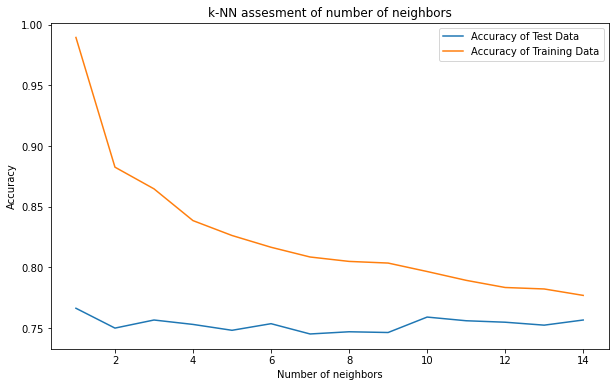

In [117]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [122]:
knn5 = KNeighborsClassifier(n_neighbors = 6)

knn5.fit(X_train,y_train)

y_pred = knn5.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1033
           1       0.70      0.60      0.65       619

    accuracy                           0.75      1652
   macro avg       0.74      0.72      0.73      1652
weighted avg       0.75      0.75      0.75      1652



In [124]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[872, 161],
       [246, 373]], dtype=int64)

In [126]:
pickle.dump(model, open("knn_model_telco", 'wb'))

model_lgb = pickle.load(open("knn_model_telco","rb"))

# Random Forest

In [128]:
rf_model=RandomForestClassifier(max_depth=10,
    min_samples_split=4,
    min_samples_leaf=5,
    max_features=5,).fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1033
           1       0.70      0.75      0.73       619

    accuracy                           0.79      1652
   macro avg       0.77      0.78      0.78      1652
weighted avg       0.79      0.79      0.79      1652



In [131]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[836, 197],
       [154, 465]], dtype=int64)

In [132]:
pickle.dump(rf_model, open("rf_model", 'wb'))

model_rf = pickle.load(open("rf_model","rb"))

In [163]:
df3.loc[4710]

tenure                           6.00
Churn                            0.00
MonthlyCharges                  40.55
TotalCharges                   217.50
Contract_One year                0.00
Contract_Two year                1.00
PhoneService_Yes                 0.00
InternetService_Fiber optic      0.00
InternetService_No               0.00
Name: 4710, dtype: float64

In [137]:
df3.corr()

,tenure,Churn,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
tenure,1.000000,-0.354049,0.246862,0.825880,0.202338,0.563801,0.007877,0.017930,-0.037529
Churn,-0.354049,1.000000,0.192858,-0.199484,-0.178225,-0.301552,0.011691,0.307463,-0.227578
MonthlyCharges,0.246862,0.192858,1.000000,0.651065,0.004810,-0.073256,0.248033,0.787195,-0.763191
TotalCharges,0.825880,-0.199484,0.651065,1.000000,0.170569,0.358036,0.113008,0.360769,-0.374878
Contract_One year,0.202338,-0.178225,0.004810,0.170569,1.000000,-0.288843,-0.003142,-0.076809,0.038061
Contract_Two year,0.563801,-0.301552,-0.073256,0.358036,-0.288843,1.000000,0.004442,-0.209965,0.217542
PhoneService_Yes,0.007877,0.011691,0.248033,0.113008,-0.003142,0.004442,1.000000,0.290183,0.171817
InternetService_Fiber optic,0.017930,0.307463,0.787195,0.360769,-0.076809,-0.209965,0.290183,1.000000,-0.465736
InternetService_No,-0.037529,-0.227578,-0.763191,-0.374878,0.038061,0.217542,0.171817,-0.465736,1.000000


In [138]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PhoneService_Yes', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [168]:
X_test

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
4710,20,20.000000,416.450000,1,0,1,0,1
3702,11,20.400000,231.450000,0,1,1,0,1
6586,71,82.550000,5832.650000,0,1,1,0,0
7799,1,70.885051,70.885051,0,0,1,1,0
2085,48,29.500000,1423.050000,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7508,1,19.497544,19.497544,0,0,1,0,1
3777,66,105.200000,6936.850000,0,0,1,1,0
5593,6,80.250000,493.400000,0,1,1,0,0
8115,1,45.399465,45.399465,0,0,1,0,0


In [176]:
model_rf.predict_proba(pd.DataFrame(X_test.loc[4710].values).T)

array([[0.99459465, 0.00540535]])

In [166]:
pd.DataFrame(X_test.loc[4710].values).T

,0,1,2,3,4,5,6,7
0,20.0,20.0,416.45,1.0,0.0,1.0,0.0,1.0


In [169]:
y.loc[4710]

0

In [181]:
X_train

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
1249,7,79.300000,523.150000,0,0,1,1,0
3237,5,20.450000,106.900000,0,1,1,0,1
5793,42,49.550000,2077.950000,0,0,1,0,0
5737,10,81.000000,818.050000,0,0,1,1,0
7636,3,84.342063,266.073811,0,0,1,1,0
...,...,...,...,...,...,...,...,...
4470,3,54.200000,140.400000,0,0,1,0,0
3836,1,70.850000,70.850000,0,0,1,1,0
6641,6,20.200000,123.650000,0,0,1,0,1
3064,10,20.550000,187.350000,0,0,1,0,1


In [182]:
df2=pickle.load(open("final_telco2","rb"))

In [188]:
df2 = df2.drop(["Churn"],axis=1)

In [189]:
df2

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
0,1,29.85,29.85,0,0,0,0,0
1,34,56.95,1889.50,1,0,1,0,0
2,2,53.85,108.15,0,0,1,0,0
3,45,42.30,1840.75,1,0,0,0,0
4,2,70.70,151.65,0,0,1,1,0
...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,0,0
7039,72,103.20,7362.90,1,0,1,1,0
7040,11,29.60,346.45,0,0,0,0,0
7041,4,74.40,306.60,0,0,1,1,0


In [191]:
pickle.dump(df2.loc[5500:],open("test","wb"))


In [210]:
import random
random.choices( df3.index, k=19 )

[2213,
 4457,
 3366,
 437,
 4289,
 2968,
 1490,
 4691,
 6728,
 4422,
 5691,
 2086,
 856,
 5533,
 1378,
 3914,
 2085,
 5853,
 5865]

In [202]:
df3.loc[6877]

tenure                          1.0
Churn                           1.0
MonthlyCharges                 69.7
TotalCharges                   69.7
Contract_One year               0.0
Contract_Two year               0.0
PhoneService_Yes                1.0
InternetService_Fiber optic     1.0
InternetService_No              0.0
Name: 6877, dtype: float64

In [208]:
X_test

,tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PhoneService_Yes,InternetService_Fiber optic,InternetService_No
4710,20,20.000000,416.450000,1,0,1,0,1
3702,11,20.400000,231.450000,0,1,1,0,1
6586,71,82.550000,5832.650000,0,1,1,0,0
7799,1,70.885051,70.885051,0,0,1,1,0
2085,48,29.500000,1423.050000,0,0,0,0,0
...,...,...,...,...,...,...,...,...
7508,1,19.497544,19.497544,0,0,1,0,1
3777,66,105.200000,6936.850000,0,0,1,1,0
5593,6,80.250000,493.400000,0,1,1,0,0
8115,1,45.399465,45.399465,0,0,1,0,0


In [220]:
 
for i in model_rf.predict_proba(X_test):
    print(i[0])

0.9945946476337312
0.9950974025974026
0.9999415204678362
0.06869969659236834
0.6942834197069392
0.8568660365792417
0.30640740049123477
0.9061820793189785
0.8385929449653715
0.9311430190569877
0.7388241736986272
0.9675268588314424
0.39891151992282725
0.989431521630778
0.16512330828671526
0.21086778135796191
0.9125423458298576
0.9559991960031203
0.15265289905931304
0.988962148962149
0.6251594918854628
0.4656567871865132
0.29368367269607315
0.1622011937179645
0.9929706470679491
0.4995333040285832
0.39166893641235956
0.8387768887073571
0.34743859678171174
0.9998983739837398
0.9397981779116459
0.6511823889796062
0.03957845676946775
0.5668832900943859
0.6003346165239798
0.9913093406593405
0.1412730104811662
0.7947782499893609
0.5864472577288303
0.3572951665962713
0.040600089146574515
0.8997927409504743
0.9953337571003813
0.9913172289770135
0.9958333333333332
0.6045699302434897
0.9998983739837398
0.45206335215812127
0.06853941368228225
0.9998338578547076
0.15030772698746342
0.9155207747368227